In [8]:
# 1.Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models
from keras import layers

In [9]:
 # 2.Load and Preprocess Data
 (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [7]:
#3.Define Model Building and Training Function
def build_and_train_model(hidden_layers=2, units=32, activation='relu', loss_function='binary_crossentropy', dropout_rate=0.0, epochs=20, batch_size=512):
    model = models.Sequential()
    model.add(layers.Dense(units, activation=activation, input_shape=(10000,)))

    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(units, activation=activation))
        if dropout_rate > 0.0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss=loss_function,
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=2)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    return model, history, test_loss, test_acc


In [15]:
#4.Define Plotting Function
def plot_performance(history, title_suffix=''):
    metrics = history.history
    epochs = range(1, len(metrics['accuracy']) + 1)

    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, metrics['accuracy'], 'bo-', label='Train Acc')
    plt.plot(epochs, metrics['val_accuracy'], 'ro-', label='Val Acc')
    plt.title('Training and Validation Accuracy ' + title_suffix)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics['loss'], 'bo-', label='Train Loss')
    plt.plot(epochs, metrics['val_loss'], 'ro-', label='Val Loss')
    plt.title('Training and Validation Loss ' + title_suffix)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()




Experiment 5.1: 1 Hidden Layers, 32 Units, ReLU, BCE Loss


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
40/40 - 2s - 62ms/step - accuracy: 0.7962 - loss: 0.4798 - val_accuracy: 0.8588 - val_loss: 0.3712
Epoch 2/20
40/40 - 1s - 35ms/step - accuracy: 0.8977 - loss: 0.2959 - val_accuracy: 0.8520 - val_loss: 0.3544
Epoch 3/20
40/40 - 1s - 36ms/step - accuracy: 0.9151 - loss: 0.2415 - val_accuracy: 0.8916 - val_loss: 0.2783
Epoch 4/20
40/40 - 1s - 32ms/step - accuracy: 0.9317 - loss: 0.2002 - val_accuracy: 0.8842 - val_loss: 0.2948
Epoch 5/20
40/40 - 1s - 33ms/step - accuracy: 0.9387 - loss: 0.1793 - val_accuracy: 0.8822 - val_loss: 0.3009
Epoch 6/20
40/40 - 2s - 51ms/step - accuracy: 0.9458 - loss: 0.1606 - val_accuracy: 0.8916 - val_loss: 0.2782
Epoch 7/20
40/40 - 2s - 38ms/step - accuracy: 0.9499 - loss: 0.1490 - val_accuracy: 0.8892 - val_loss: 0.2842
Epoch 8/20
40/40 - 1s - 36ms/step - accuracy: 0.9556 - loss: 0.1353 - val_accuracy: 0.8854 - val_loss: 0.3008
Epoch 9/20
40/40 - 1s - 30ms/step - accuracy: 0.9592 - loss: 0.1246 - val_accuracy: 0.8858 - val_loss: 0.3044
Epoch 10/2

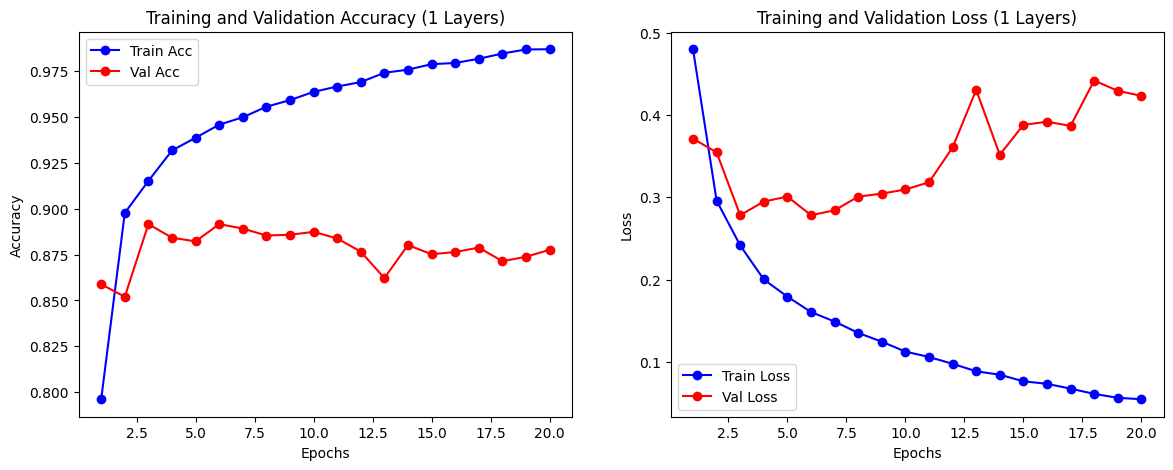

Test Accuracy: 0.8648, Test Loss: 0.4487

Experiment 5.1: 2 Hidden Layers, 32 Units, ReLU, BCE Loss
Epoch 1/20
40/40 - 3s - 65ms/step - accuracy: 0.7914 - loss: 0.4759 - val_accuracy: 0.8786 - val_loss: 0.3327
Epoch 2/20
40/40 - 1s - 30ms/step - accuracy: 0.8977 - loss: 0.2774 - val_accuracy: 0.8854 - val_loss: 0.2920
Epoch 3/20
40/40 - 1s - 31ms/step - accuracy: 0.9220 - loss: 0.2150 - val_accuracy: 0.8916 - val_loss: 0.2716
Epoch 4/20
40/40 - 1s - 32ms/step - accuracy: 0.9352 - loss: 0.1792 - val_accuracy: 0.8890 - val_loss: 0.2799
Epoch 5/20
40/40 - 1s - 33ms/step - accuracy: 0.9437 - loss: 0.1552 - val_accuracy: 0.8872 - val_loss: 0.2872
Epoch 6/20
40/40 - 1s - 30ms/step - accuracy: 0.9532 - loss: 0.1342 - val_accuracy: 0.8850 - val_loss: 0.3128
Epoch 7/20
40/40 - 1s - 31ms/step - accuracy: 0.9612 - loss: 0.1138 - val_accuracy: 0.8838 - val_loss: 0.3215
Epoch 8/20
40/40 - 2s - 40ms/step - accuracy: 0.9664 - loss: 0.0994 - val_accuracy: 0.8518 - val_loss: 0.4632
Epoch 9/20
40/40 - 2

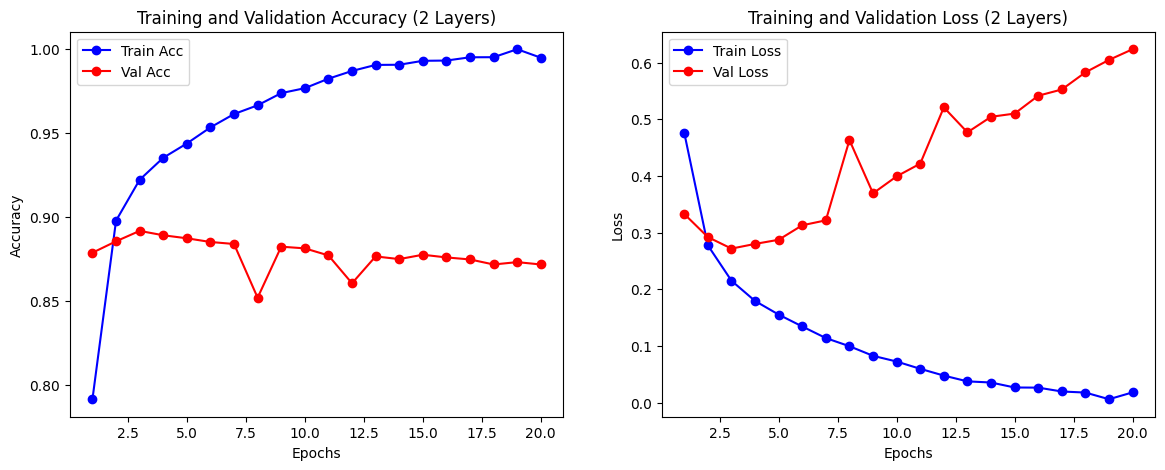

Test Accuracy: 0.8626, Test Loss: 0.6689

Experiment 5.1: 3 Hidden Layers, 32 Units, ReLU, BCE Loss
Epoch 1/20
40/40 - 2s - 62ms/step - accuracy: 0.7788 - loss: 0.4906 - val_accuracy: 0.8812 - val_loss: 0.3337
Epoch 2/20
40/40 - 2s - 47ms/step - accuracy: 0.8942 - loss: 0.2808 - val_accuracy: 0.8614 - val_loss: 0.3398
Epoch 3/20
40/40 - 2s - 40ms/step - accuracy: 0.9200 - loss: 0.2130 - val_accuracy: 0.8924 - val_loss: 0.2758
Epoch 4/20
40/40 - 1s - 30ms/step - accuracy: 0.9359 - loss: 0.1744 - val_accuracy: 0.8770 - val_loss: 0.3314
Epoch 5/20
40/40 - 1s - 33ms/step - accuracy: 0.9452 - loss: 0.1509 - val_accuracy: 0.8732 - val_loss: 0.3538
Epoch 6/20
40/40 - 1s - 30ms/step - accuracy: 0.9570 - loss: 0.1223 - val_accuracy: 0.8850 - val_loss: 0.3345
Epoch 7/20
40/40 - 1s - 31ms/step - accuracy: 0.9664 - loss: 0.0995 - val_accuracy: 0.8842 - val_loss: 0.3582
Epoch 8/20
40/40 - 1s - 31ms/step - accuracy: 0.9705 - loss: 0.0854 - val_accuracy: 0.8822 - val_loss: 0.3832
Epoch 9/20
40/40 - 1

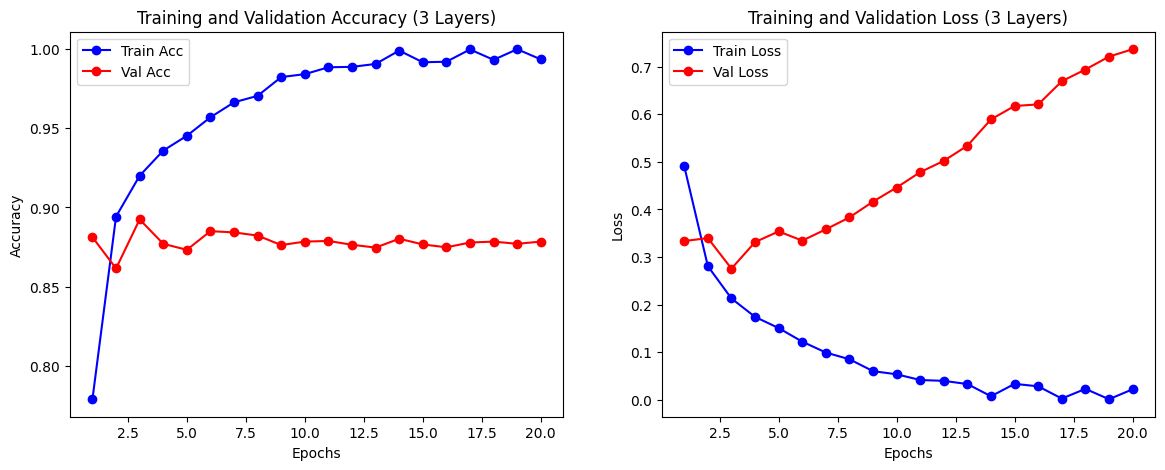

Test Accuracy: 0.8624, Test Loss: 0.7813


In [16]:
# Experiment 5.1 - Vary Hidden Layers

for layers_count in [1, 2, 3]:
    print(f'\nExperiment 5.1: {layers_count} Hidden Layers, 32 Units, ReLU, BCE Loss')
    model, history, loss, acc = build_and_train_model(hidden_layers=layers_count)
    plot_performance(history, f'({layers_count} Layers)')
    print(f'Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}')



Experiment 5.2: 2 Hidden Layers, 32 Units, ReLU, BCE Loss
Epoch 1/20
40/40 - 3s - 63ms/step - accuracy: 0.7932 - loss: 0.4826 - val_accuracy: 0.8816 - val_loss: 0.3375
Epoch 2/20
40/40 - 1s - 31ms/step - accuracy: 0.8993 - loss: 0.2796 - val_accuracy: 0.8926 - val_loss: 0.2786
Epoch 3/20
40/40 - 1s - 32ms/step - accuracy: 0.9209 - loss: 0.2182 - val_accuracy: 0.8830 - val_loss: 0.2814
Epoch 4/20
40/40 - 1s - 32ms/step - accuracy: 0.9328 - loss: 0.1839 - val_accuracy: 0.8456 - val_loss: 0.4076
Epoch 5/20
40/40 - 1s - 31ms/step - accuracy: 0.9452 - loss: 0.1541 - val_accuracy: 0.8708 - val_loss: 0.3388
Epoch 6/20
40/40 - 1s - 35ms/step - accuracy: 0.9521 - loss: 0.1374 - val_accuracy: 0.8866 - val_loss: 0.3117
Epoch 7/20
40/40 - 2s - 50ms/step - accuracy: 0.9594 - loss: 0.1176 - val_accuracy: 0.8856 - val_loss: 0.3229
Epoch 8/20
40/40 - 1s - 31ms/step - accuracy: 0.9648 - loss: 0.1033 - val_accuracy: 0.8818 - val_loss: 0.3471
Epoch 9/20
40/40 - 1s - 31ms/step - accuracy: 0.9709 - loss: 

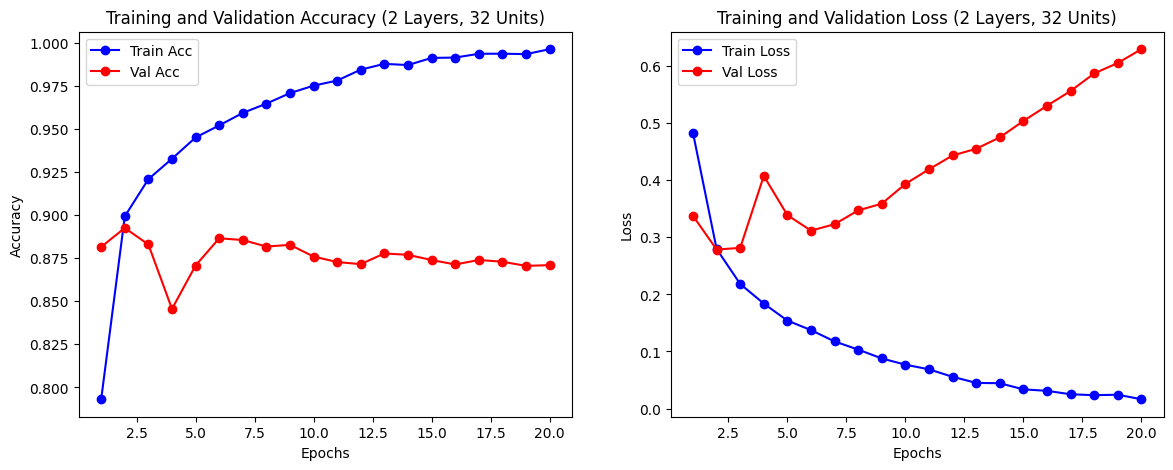

Test Accuracy: 0.8600, Test Loss: 0.6696

Experiment 5.2: 2 Hidden Layers, 64 Units, ReLU, BCE Loss
Epoch 1/20
40/40 - 3s - 73ms/step - accuracy: 0.7807 - loss: 0.4722 - val_accuracy: 0.8638 - val_loss: 0.3387
Epoch 2/20
40/40 - 2s - 50ms/step - accuracy: 0.8953 - loss: 0.2728 - val_accuracy: 0.8444 - val_loss: 0.3767
Epoch 3/20
40/40 - 2s - 48ms/step - accuracy: 0.9158 - loss: 0.2209 - val_accuracy: 0.8932 - val_loss: 0.2771
Epoch 4/20
40/40 - 2s - 59ms/step - accuracy: 0.9334 - loss: 0.1758 - val_accuracy: 0.8898 - val_loss: 0.2835
Epoch 5/20
40/40 - 2s - 61ms/step - accuracy: 0.9445 - loss: 0.1486 - val_accuracy: 0.8848 - val_loss: 0.3100
Epoch 6/20
40/40 - 2s - 51ms/step - accuracy: 0.9553 - loss: 0.1235 - val_accuracy: 0.8876 - val_loss: 0.3159
Epoch 7/20
40/40 - 3s - 64ms/step - accuracy: 0.9659 - loss: 0.0986 - val_accuracy: 0.8832 - val_loss: 0.3439
Epoch 8/20
40/40 - 2s - 61ms/step - accuracy: 0.9731 - loss: 0.0783 - val_accuracy: 0.8828 - val_loss: 0.3651
Epoch 9/20
40/40 - 3

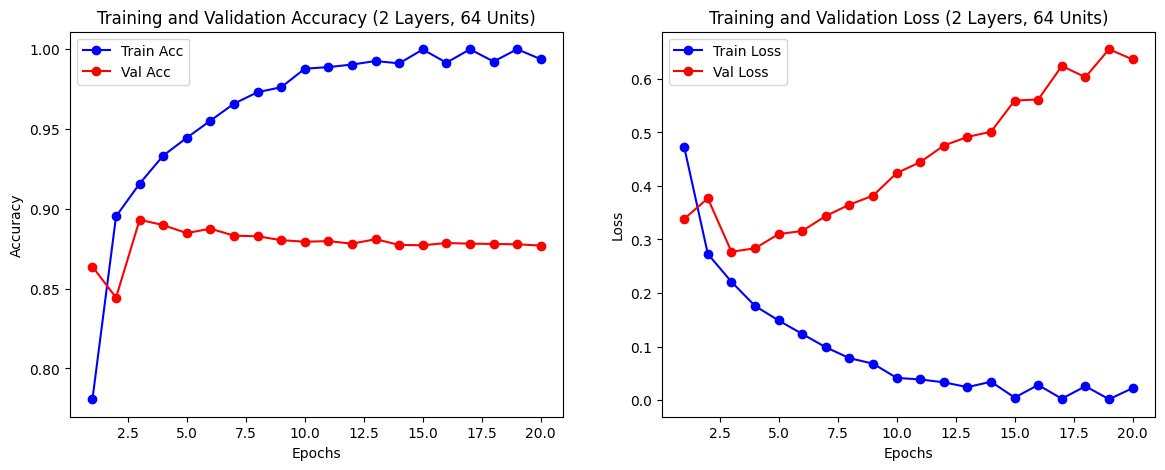

Test Accuracy: 0.8684, Test Loss: 0.6648


In [17]:
# Experiment 5.2 - Vary Hidden Units

for units_count in [32, 64]:
    print(f'\nExperiment 5.2: 2 Hidden Layers, {units_count} Units, ReLU, BCE Loss')
    model, history, loss, acc = build_and_train_model(hidden_layers=2, units=units_count)
    plot_performance(history, f'(2 Layers, {units_count} Units)')
    print(f'Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}')



Experiment 5.3: 2 Hidden Layers, 32 Units, ReLU, MSE Loss
Epoch 1/20
40/40 - 3s - 78ms/step - accuracy: 0.7819 - loss: 0.1663 - val_accuracy: 0.7656 - val_loss: 0.1564
Epoch 2/20
40/40 - 1s - 31ms/step - accuracy: 0.8896 - loss: 0.0915 - val_accuracy: 0.8788 - val_loss: 0.0946
Epoch 3/20
40/40 - 1s - 31ms/step - accuracy: 0.9113 - loss: 0.0712 - val_accuracy: 0.8800 - val_loss: 0.0879
Epoch 4/20
40/40 - 1s - 31ms/step - accuracy: 0.9291 - loss: 0.0588 - val_accuracy: 0.8872 - val_loss: 0.0830
Epoch 5/20
40/40 - 1s - 32ms/step - accuracy: 0.9398 - loss: 0.0506 - val_accuracy: 0.8802 - val_loss: 0.0887
Epoch 6/20
40/40 - 1s - 31ms/step - accuracy: 0.9456 - loss: 0.0453 - val_accuracy: 0.8886 - val_loss: 0.0823
Epoch 7/20
40/40 - 1s - 31ms/step - accuracy: 0.9542 - loss: 0.0395 - val_accuracy: 0.8840 - val_loss: 0.0870
Epoch 8/20
40/40 - 1s - 30ms/step - accuracy: 0.9614 - loss: 0.0345 - val_accuracy: 0.8844 - val_loss: 0.0848
Epoch 9/20
40/40 - 2s - 44ms/step - accuracy: 0.9650 - loss: 

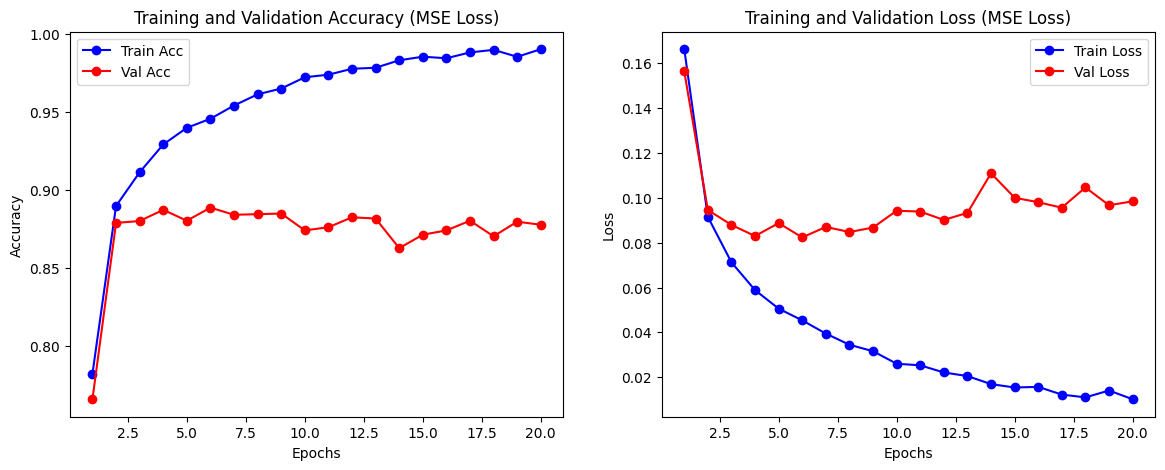

Test Accuracy: 0.8680, Test Loss: 0.1083


In [18]:
# Experiment 5.3 - Use MSE Loss

print('\nExperiment 5.3: 2 Hidden Layers, 32 Units, ReLU, MSE Loss')
model, history, loss, acc = build_and_train_model(loss_function='mse')
plot_performance(history, '(MSE Loss)')
print(f'Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}')



Experiment 5.4: 2 Hidden Layers, 32 Units, tanh Activation, BCE Loss
Epoch 1/20
40/40 - 3s - 67ms/step - accuracy: 0.7998 - loss: 0.4485 - val_accuracy: 0.8830 - val_loss: 0.3042
Epoch 2/20
40/40 - 2s - 49ms/step - accuracy: 0.9009 - loss: 0.2517 - val_accuracy: 0.8788 - val_loss: 0.3067
Epoch 3/20
40/40 - 1s - 31ms/step - accuracy: 0.9251 - loss: 0.1945 - val_accuracy: 0.8890 - val_loss: 0.2864
Epoch 4/20
40/40 - 1s - 32ms/step - accuracy: 0.9356 - loss: 0.1650 - val_accuracy: 0.8762 - val_loss: 0.3452
Epoch 5/20
40/40 - 1s - 32ms/step - accuracy: 0.9488 - loss: 0.1371 - val_accuracy: 0.8856 - val_loss: 0.3227
Epoch 6/20
40/40 - 1s - 31ms/step - accuracy: 0.9564 - loss: 0.1204 - val_accuracy: 0.8766 - val_loss: 0.3823
Epoch 7/20
40/40 - 1s - 31ms/step - accuracy: 0.9627 - loss: 0.1046 - val_accuracy: 0.8794 - val_loss: 0.3752
Epoch 8/20
40/40 - 1s - 31ms/step - accuracy: 0.9650 - loss: 0.0996 - val_accuracy: 0.8740 - val_loss: 0.4322
Epoch 9/20
40/40 - 1s - 32ms/step - accuracy: 0.97

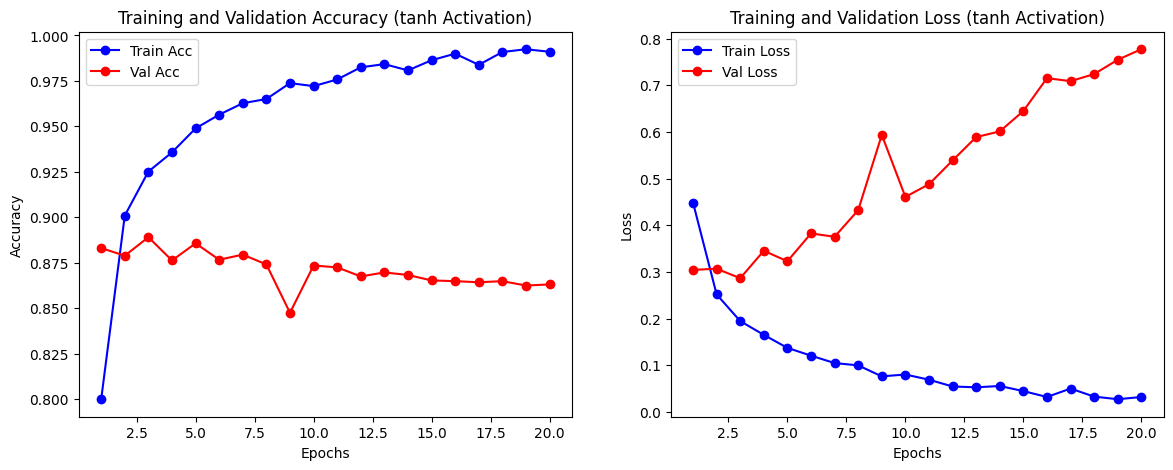

Test Accuracy: 0.8503, Test Loss: 0.8370


In [19]:
# Experiment 5.4 - Use tanh Activation

print('\nExperiment 5.4: 2 Hidden Layers, 32 Units, tanh Activation, BCE Loss')
model, history, loss, acc = build_and_train_model(activation='tanh')
plot_performance(history, '(tanh Activation)')
print(f'Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}')



Experiment 5.5: 2 Hidden Layers, 32 Units, ReLU, BCE Loss, Dropout 0.5
Epoch 1/20
40/40 - 2s - 62ms/step - accuracy: 0.7748 - loss: 0.4976 - val_accuracy: 0.8170 - val_loss: 0.4129
Epoch 2/20
40/40 - 2s - 40ms/step - accuracy: 0.8844 - loss: 0.3120 - val_accuracy: 0.8916 - val_loss: 0.2885
Epoch 3/20
40/40 - 2s - 47ms/step - accuracy: 0.9142 - loss: 0.2440 - val_accuracy: 0.8932 - val_loss: 0.2751
Epoch 4/20
40/40 - 1s - 31ms/step - accuracy: 0.9275 - loss: 0.2080 - val_accuracy: 0.8880 - val_loss: 0.2872
Epoch 5/20
40/40 - 1s - 32ms/step - accuracy: 0.9383 - loss: 0.1816 - val_accuracy: 0.8866 - val_loss: 0.2864
Epoch 6/20
40/40 - 1s - 31ms/step - accuracy: 0.9486 - loss: 0.1557 - val_accuracy: 0.8526 - val_loss: 0.4023
Epoch 7/20
40/40 - 1s - 30ms/step - accuracy: 0.9541 - loss: 0.1382 - val_accuracy: 0.8840 - val_loss: 0.3253
Epoch 8/20
40/40 - 1s - 31ms/step - accuracy: 0.9584 - loss: 0.1225 - val_accuracy: 0.8832 - val_loss: 0.3390
Epoch 9/20
40/40 - 1s - 32ms/step - accuracy: 0.

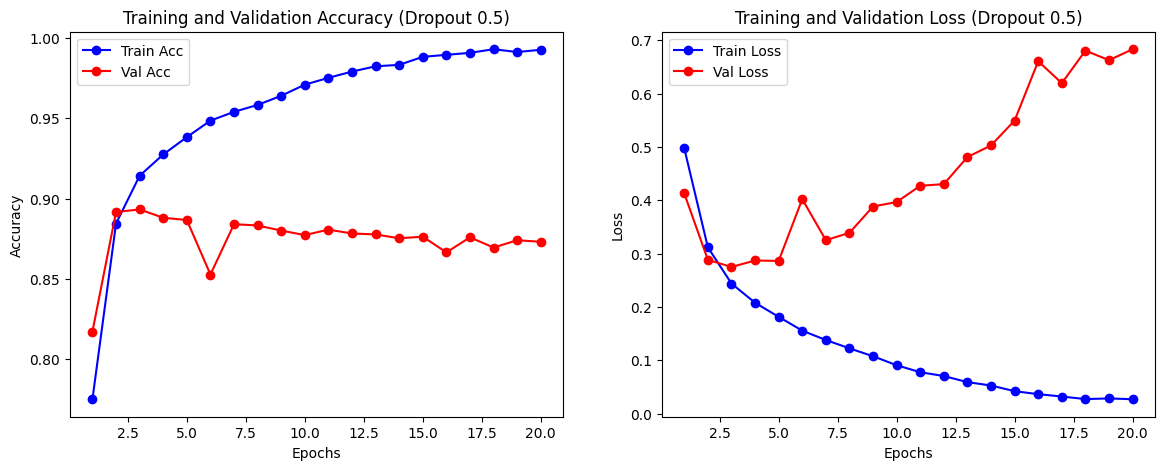

Test Accuracy: 0.8605, Test Loss: 0.7369


In [20]:
#  Experiment 5.5 - Use Dropout for Regularization

print('\nExperiment 5.5: 2 Hidden Layers, 32 Units, ReLU, BCE Loss, Dropout 0.5')
model, history, loss, acc = build_and_train_model(dropout_rate=0.5)
plot_performance(history, '(Dropout 0.5)')
print(f'Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}')




In [21]:
# Example experiment results stored as list of dictionaries

results = [
    {"Experiment": "1 hidden layer, 32 units, ReLU, BCE loss", "Max Validation Accuracy": 0.87, "Test Accuracy": 0.87},
    {"Experiment": "2 hidden layers, 32 units, ReLU, BCE loss", "Max Validation Accuracy": 0.88, "Test Accuracy": 0.88},
    {"Experiment": "3 hidden layers, 32 units, ReLU, BCE loss", "Max Validation Accuracy": 0.88, "Test Accuracy": 0.88},
    {"Experiment": "2 hidden layers, 32 units, ReLU, MSE loss", "Max Validation Accuracy": 0.84, "Test Accuracy": 0.84},
    {"Experiment": "2 hidden layers, 32 units, tanh, BCE loss", "Max Validation Accuracy": 0.85, "Test Accuracy": 0.85},
    {"Experiment": "2 hidden layers, 64 units, ReLU, BCE loss", "Max Validation Accuracy": 0.88, "Test Accuracy": 0.88},
    {"Experiment": "2 hidden layers, 32 units, ReLU, BCE loss, Dropout 0.5", "Max Validation Accuracy": 0.88, "Test Accuracy": 0.88},
]

# Print the results as a table
print(f"{'Experiment':55} | {'Max Val Accuracy':17} | {'Test Accuracy':13}")
print("-" * 95)
for res in results:
    print(f"{res['Experiment']:55} | {res['Max Validation Accuracy']:<17.2f} | {res['Test Accuracy']:<13.2f}")


Experiment                                              | Max Val Accuracy  | Test Accuracy
-----------------------------------------------------------------------------------------------
1 hidden layer, 32 units, ReLU, BCE loss                | 0.87              | 0.87         
2 hidden layers, 32 units, ReLU, BCE loss               | 0.88              | 0.88         
3 hidden layers, 32 units, ReLU, BCE loss               | 0.88              | 0.88         
2 hidden layers, 32 units, ReLU, MSE loss               | 0.84              | 0.84         
2 hidden layers, 32 units, tanh, BCE loss               | 0.85              | 0.85         
2 hidden layers, 64 units, ReLU, BCE loss               | 0.88              | 0.88         
2 hidden layers, 32 units, ReLU, BCE loss, Dropout 0.5  | 0.88              | 0.88         
